# Linear regression project

In [138]:
#import all the library required for doing the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##  Data Preprocessing
### Let us load data file look into various missing values and try to delete if they don't impact significantely to build the model

In [139]:
data= pd.read_csv("cars.csv") # Load CSV file

In [140]:
data.shape # Looking at number of rows and columns

(7253, 14)

#### We have 14 columns and 7253 rows of data loaded in data variable

In [141]:
data.dtypes # looking at various data Types

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

#### We have 2 float and 3 integer variables rest all are object. We will work on object variables further as we need continous or numeric variables for linear regression

In [142]:
data.isnull().sum().sort_values(ascending=False) #Trying to find list of null values across columns

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [143]:
data.isnull().sum(axis=1).value_counts() #count  null values to check if we have any pettern

1    5335
2    1048
0     823
4      36
5      10
3       1
dtype: int64

#### Looking into missing or null values across columns. I think New_price variable wouldn't add much value as we have more than 85% of values missing.


In [144]:
data = data.dropna(subset=['Price']) # drop all the rows that have price as null as this is my dependent variable. 

#### Price is our dependent variable that we plan on predicting. Instead of making up for missing value in dependent variable, I pefer to drop missing in Price as we still will be left with significant data to build model and predict.

In [145]:
data.isnull().sum().sort_values(ascending=False) #recheck number of null values

New_Price            5195
Seats                  42
Power                  36
Engine                 36
Mileage                 2
Price                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

#### Let us drop  these colums 'New_Price','S.No.','Name', 'Location' as they will not add value to our model
#### Let us also drop missing values in seats and mileage as we wouldn't loose significant amount of data

In [146]:
data = data.dropna(subset=['Seats']) #Let us drop rows of 6 missing values in Seats as it will not effect our prediction
data = data.dropna(subset=['Mileage']) #Let us drop rows of 2 missing values in Mileage as it will not effect our prediction
data.drop(['New_Price','S.No.','Name', 'Location'],axis=1,inplace=True) #drop New_Price column as it has too many missing values and also drop Location, Name and S. No from data
data.isnull().sum().sort_values(ascending=False) #recheck number of null values

Price                0
Seats                0
Power                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
dtype: int64

#### Fuel, Transmission and Owner _Type look like categorical variable. We will have to create dummy variable across them to use these variables in our model

In [147]:
data.Fuel_Type.unique() # Number of unique fuel type


array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [148]:
data.Transmission.unique() # Number of unique transmission type

array(['Manual', 'Automatic'], dtype=object)

In [149]:

data.Owner_Type.unique() # Number of unique Owner_Type

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [150]:
data = pd.get_dummies(data, columns=['Transmission']) #create dummy variables for transmission
data = pd.get_dummies(data, columns=['Owner_Type']) # Create dummy variables for Owner_Type
data = pd.get_dummies(data, columns=['Fuel_Type']) #Create dummy variables for Fuel_Type
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,1,1,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,1,1,0,0,0,0,1,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,1,0,0,0,0,0,0,1
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,1,0,0,0,0,1,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1,0,0,0,1,0,0,1,0,0


### We can see that Mileage, Engine and Power can be used ones we strip and convert them to float

In [151]:
def Power(x): # function to strip power variable as it has some null values.
    if isinstance(x, str):
        if x == "null bhp":
            return np.nan
        else:
            splt = x.split(" ")
            return splt[0].strip()
    else:
        return np.nan


data["Power"] = data["Power"].apply(Power) # apply  power function to strip

data.dropna(subset=["Power"], inplace=True) # drop null values

data["Power"] = data["Power"].astype("float64") # convert to float

In [152]:
temp = data["Mileage"].str.split(" ", n = 1, expand = True) # Mileage can be delt without creating function
data["Mileage"]=temp[0]
del temp
temp = data["Engine"].str.split(" ", n = 1, expand = True) # Engine variable can also be dealt without creating function
data["Engine"]=temp[0]
del temp


In [153]:
data["Mileage"]=data["Mileage"].astype(float) # convert mileage to float
data["Engine"]=data["Engine"].astype(float) #Convert Engine to float

In [154]:
data.dtypes # rechec to see if all variables have desired data type 

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Transmission_Automatic         uint8
Transmission_Manual            uint8
Owner_Type_First               uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
Fuel_Type_CNG                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
dtype: object

In [155]:
data['Price'] = data['Price']*100000 #convert the price in lakhs
data.describe() # Get over all glance of data especially skewness

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919e+05,0.289850,0.710150,0.824080,0.001192,0.157527,0.017200,0.009366,0.536785,0.001703,0.452146
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,1.124945e+06,0.453731,0.453731,0.380784,0.034509,0.364328,0.130028,0.096334,0.498688,0.041236,0.497747
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,4.400000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000e+05,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,1.000000e+06,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,1.600000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


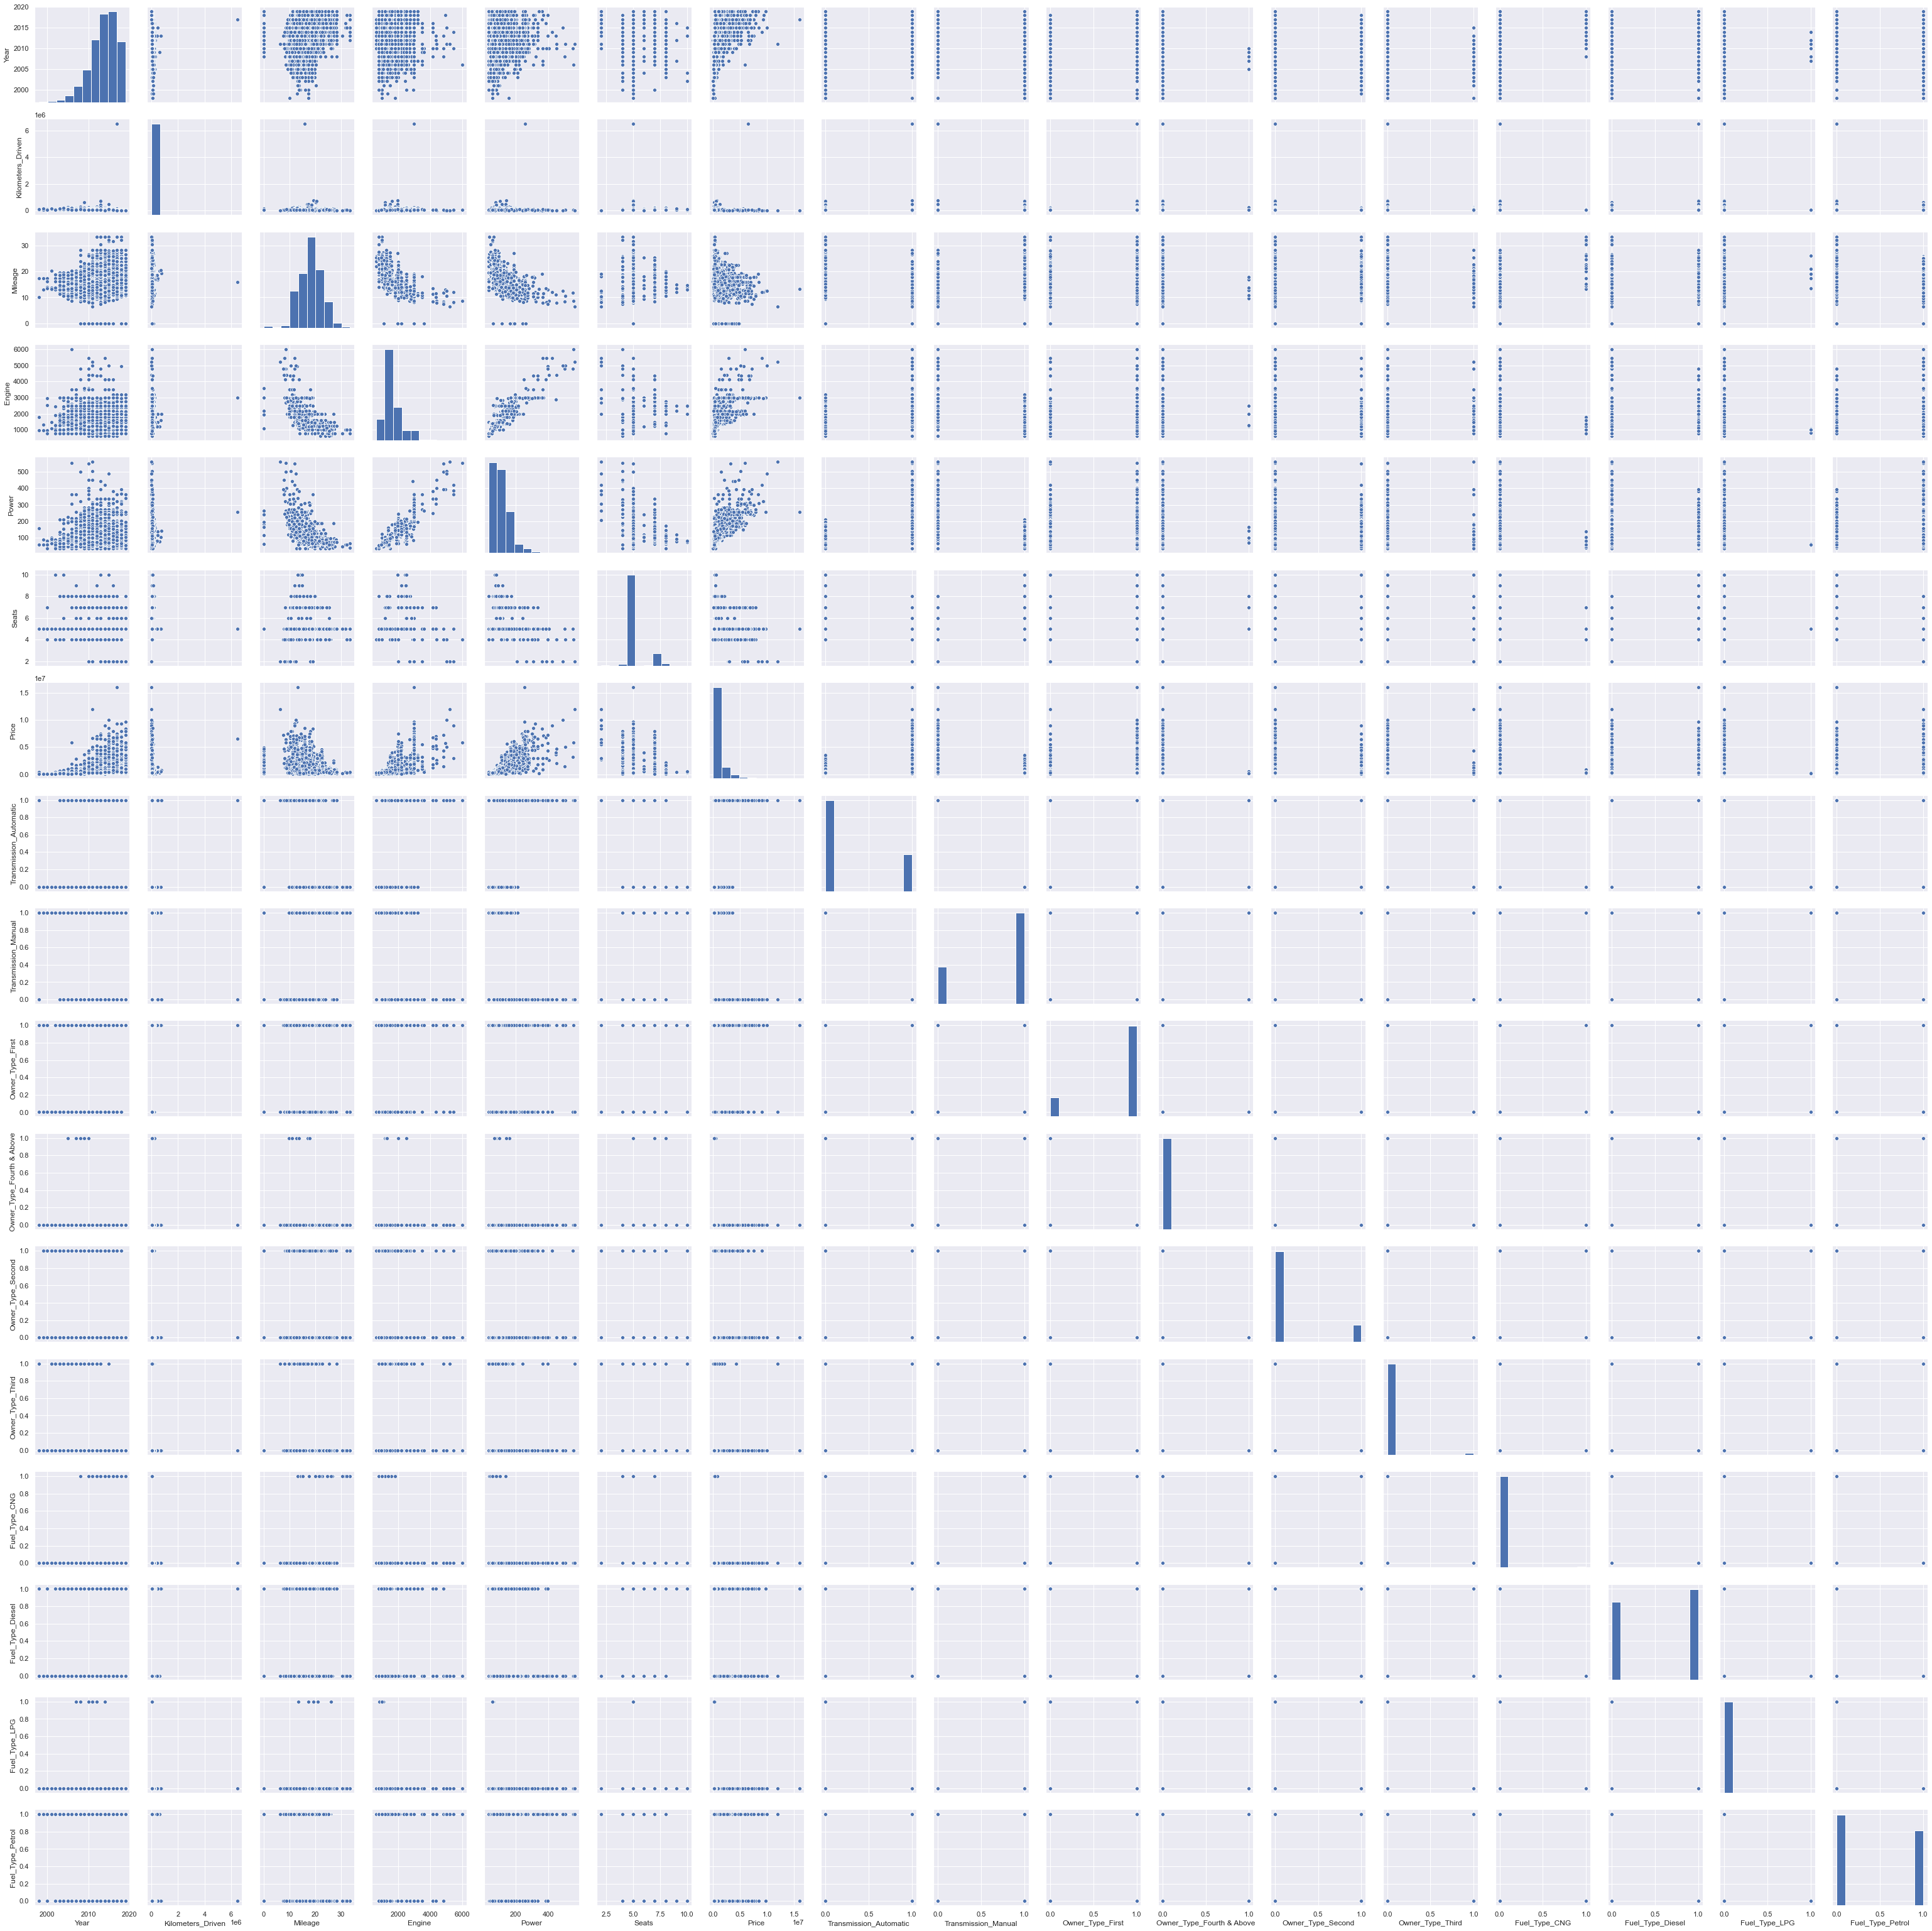

In [156]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(float) #convert Kilometers to float
sns.pairplot(data)  # check for pairplot to see any linearity

## Dependent variable data prepration

### Dependent variable Price needs to be thoroughly examined for skewnwss and to apply transformation to improve model

#### Let us plot box plot and Histogram

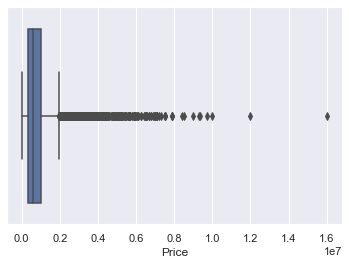

In [157]:

sns.boxplot(data['Price'])

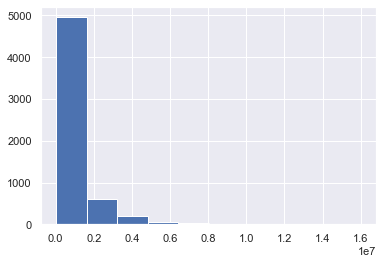

In [108]:
plt.hist(data['Price'], bins = 10)
plt.show()

### Price is extremely right skewed and has very high number of outliers.
### We have lot of outliers and I feel manipulating or deleting them will be a bad idea as the percentage of outliers is more
### Let us transform and see if we can improve the skewness

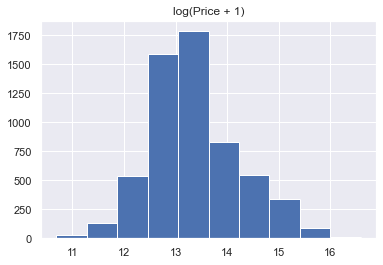

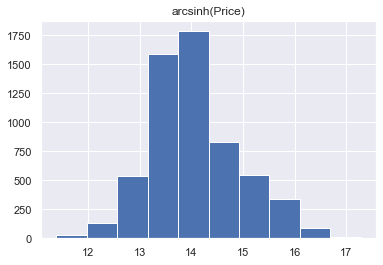

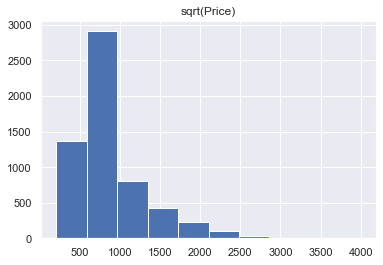

In [109]:
plt.hist(np.log(data['Price'] + 1), 10)
plt.title('log(Price + 1)')
plt.show()
plt.hist(np.arcsinh(data['Price']), 10)
plt.title('arcsinh(Price)')
plt.show()
plt.hist(np.sqrt(data['Price']), 10)
plt.title('sqrt(Price)')
plt.show()

### Log transformaton and arc sin transformation may be useful as they convert data into nearly normal
### Sqrt transformation does good job but still has right skewness

In [110]:
np.random.seed(1) # Let us randomly check 10 sample rows across our data frame data
data.sample(n=10)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
5495,2015,26000,17.01,1582.0,126.20,5.0,1265000.0,1,0,1,0,0,0,0,1,0,0
2228,2016,65263,17.50,1373.0,80.46,7.0,750000.0,0,1,1,0,0,0,1,0,0,0
2150,2016,67472,16.00,2179.0,140.00,7.0,1450000.0,0,1,1,0,0,0,0,1,0,0
664,2008,170000,16.80,1493.0,110.00,5.0,150000.0,0,1,0,0,1,0,0,1,0,0
570,2011,42086,17.00,1497.0,118.00,5.0,335000.0,0,1,1,0,0,0,0,0,0,1
5542,2017,20789,11.36,2755.0,171.50,7.0,1836000.0,1,0,1,0,0,0,0,1,0,0
1112,2014,18000,21.10,814.0,55.20,5.0,250000.0,0,1,1,0,0,0,0,0,0,1
1543,2011,74000,22.32,1582.0,126.30,5.0,375000.0,0,1,0,0,1,0,0,1,0,0
3938,2010,19119,18.90,998.0,67.10,5.0,270000.0,0,1,1,0,0,0,0,0,0,1
5511,2014,74624,20.00,1399.0,68.05,5.0,565000.0,0,1,1,0,0,0,0,1,0,0


## Linear regression Models
## Model 1
### Let us build model using variables in there original form without applying any transformation

In [111]:
# lets build our linear model
# independant variables
X = data.drop(['Price'], axis=1)
# the dependent variable
y = data[['Price']]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) # Let us split train and test dat in terms 70% is to 30%.

In [113]:
regression = LinearRegression() #call linear regression
regression.fit(X_train, y_train) #apply regression to train data

LinearRegression()

In [114]:
for idx, col_name in enumerate(X_train.columns): # Let us try to find coefficient of various coefficients  of various variables
    print("The coefficient for {} is {}".format(col_name, regression.coef_[0][idx]))

The coefficient for Year is 103404.44335852627
The coefficient for Kilometers_Driven is 0.18976435980745013
The coefficient for Mileage is -19416.636830399733
The coefficient for Engine is 41.73068608738064
The coefficient for Power is 12927.087596599229
The coefficient for Seats is -101545.22058503827
The coefficient for Transmission_Automatic is 127412.84084429611
The coefficient for Transmission_Manual is -127412.84084429608
The coefficient for Owner_Type_First is -85538.92539530291
The coefficient for Owner_Type_Fourth & Above is 81603.2779043609
The coefficient for Owner_Type_Second is -114137.56617870988
The coefficient for Owner_Type_Third is 118073.21366965199
The coefficient for Fuel_Type_CNG is 79517.45751520141
The coefficient for Fuel_Type_Diesel is -14629.98406536878
The coefficient for Fuel_Type_LPG is 216666.51432739093
The coefficient for Fuel_Type_Petrol is -281553.98777722387


In [115]:
intercept = regression.intercept_[0] # Let us find y intercept.
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -207616411.9213957


In [116]:
regression.score(X_train, y_train) # Let us check how model explains the train data

0.691405047423598

In [117]:
regression.score(X_test, y_test) #Let us check how model explains the test data

0.7163488708590005

### Model 1 is good but we are unable to capture good amount of data. We are roughly capturing 70%. We can try other model using log or arcsin transformation

## Model 2
### Let us use log transformed Price variable and build a new regression model

In [125]:
data['Price']=np.log(data['Price']+1) # apply log transformation to Price 
# lets build our linear model
X = data.drop(['Price'], axis=1) # drop price and store rest of themin x and will be used as independent variable in our model
# the dependent variable
y = data[['Price']] # Let price be our y variable

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) # Let us split train and test data 30 and 70 percent

In [127]:

regression.fit(X_train, y_train) # apply regression to train data

LinearRegression()

In [128]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression.coef_[0][idx]))

The coefficient for Year is 0.1277173674263747
The coefficient for Kilometers_Driven is -4.1311161081207504e-08
The coefficient for Mileage is -0.021250668496450544
The coefficient for Engine is 0.00011645303597657575
The coefficient for Power is 0.007537482343760383
The coefficient for Seats is -0.0038857939782706245
The coefficient for Transmission_Automatic is 0.16133890555840466
The coefficient for Transmission_Manual is -0.16133890555840477
The coefficient for Owner_Type_First is 0.04888649222650907
The coefficient for Owner_Type_Fourth & Above is 0.004899024922889469
The coefficient for Owner_Type_Second is -0.011269230940358949
The coefficient for Owner_Type_Third is -0.04251628620903952
The coefficient for Fuel_Type_CNG is -0.027692345566371426
The coefficient for Fuel_Type_Diesel is 0.1777796636869142
The coefficient for Fuel_Type_LPG is 0.02132382934073353
The coefficient for Fuel_Type_Petrol is -0.17141114746127636


In [129]:
intercept = regression.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -244.4184400503621


In [130]:
regression = LinearRegression() #call linear regression
regression.fit(X_train, y_train) # apply regression on train data

LinearRegression()

In [132]:
regression.score(X_train, y_train) #Let us check how model explains the train data

0.871971010122872

In [133]:
regression.score(X_test, y_test) #Let us check how model explains the train data

0.8728994145198836

### Model 2 captures about 87.197% in our train data and predicts 87.289 % of time accurately
### We ones agian have positive correlation in this model

### Model 2 performs well compared to model 1
### Howeveyer Model 2 is of the format log(y+1)= c+ ax1+bx2... where y is the price and we need to take antilog to get actual price.
### This may not be the best model but definitely it does good job to capture more than 85% of data.
### We can further see how significant each variable is in predicting Price and drop and we can also add interactions and see if it improves the model.
### Due to to time constraint the model 2 is the best of these two.